<a href="https://colab.research.google.com/github/barouk/proj/blob/main/signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

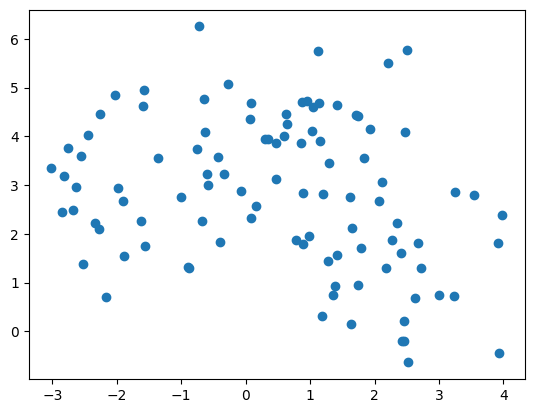

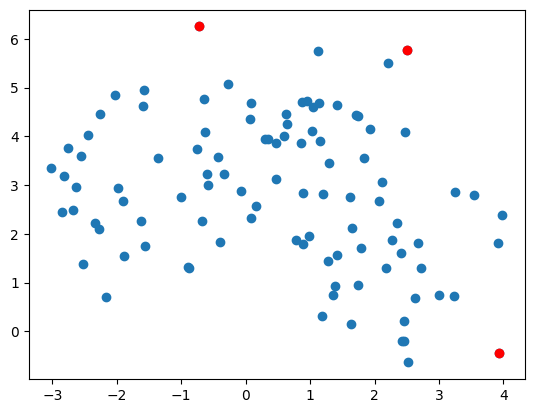

In [1]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

random.seed(1)
x, y = make_blobs(n_samples=100, centers=None, n_features=2,
                  random_state=0)



plt.scatter(x[:,0], x[:,1])
plt.show()

lof = LocalOutlierFactor(n_neighbors=20, contamination=.03)


y_pred = lof.fit_predict(x)

lofs_index=where(y_pred==-1)
values = x[lofs_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()



In [3]:
import pickle
lof = LocalOutlierFactor(n_neighbors=20, contamination=.03 ,novelty=True)
model = lof.fit(x)
pickle.dump(model,open("alg1.sav","wb"))

In [7]:
 loaded_model = pickle.load(open('/content/alg1.sav', 'rb'))

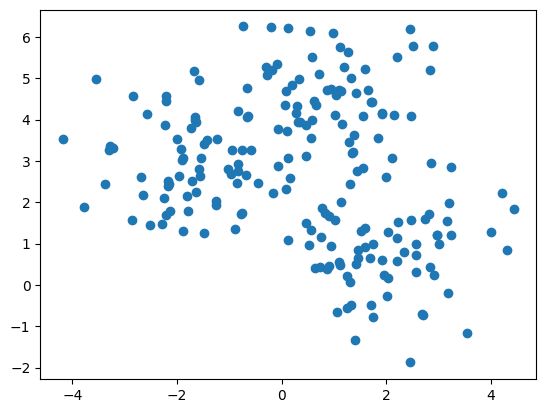

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1 -1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1]


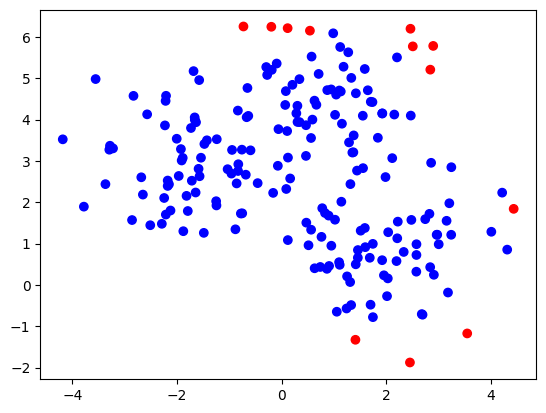

In [8]:
y, _ = make_blobs(n_samples=200, centers=None, n_features=2,
                  random_state=0)




plt.scatter(y[:,0], y[:,1])
plt.show()


y_pred = loaded_model.predict(y)

print(y_pred)


plt.scatter(y[:, 0], y[:, 1], c=['red' if pred < 0 else 'blue' for pred in y_pred])
plt.show()


In [9]:
from pandas.io.json import json_normalize
from sklearn.preprocessing import LabelEncoder

logs = [{"test" : 404} ,  {"test" : 402}  ,{"test" : 400} , {"test" : 39},{"test" : 440},{"test" :200},{"test" : 410},{"test" : 420},{"test" : 430},{"test" : 439},{"test" : 440} , {"test" : 439}
        ,{"test" : 440},{"test" : 430},{"test" : 440},{"test" : 439},{"test" : 404} ]

df_raw = json_normalize(logs)

le = LabelEncoder()
df_raw = df_raw.apply(le.fit_transform)

print(df_raw)

lof = LocalOutlierFactor(n_neighbors=10, contamination=.01)
lof.fit_predict(df_raw)

    test
0      4
1      3
2      2
3      0
4      9
5      1
6      5
7      6
8      7
9      8
10     9
11     8
12     9
13     7
14     9
15     8
16     4


<ipython-input-9-11a1df869611>:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df_raw = json_normalize(logs)


array([ 1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [10]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

ColumnNames=['CIBIL','AGE', 'SALARY', 'APPROVE_LOAN']
DataValues=[[480, 28, 610000, 'Yes'],
             [480, 42, 140000, 'No'],
             [480, 29, 420000, 'No'],
             [490, 30, 420000, 'No'],
             [480, 230, 420000, 'No'],
             [490, 29, 420000, 'No'],
             [500, 27, 420000, 'No'],
             [510, 34, 190000, 'No'],
             [590, 34, 190000, 'No'],
             [550, 24, 330000, 'Yes'],
             [560, 34, 160000, 'Yes'],
             [560, 25, 300000, 'Yes'],
             [570, 34, 450000, 'Yes'],
             [590, 30, 140000, 'Yes'],
             [600, 33, 600000, 'Yes'],
             [600, 22, 400000, 'Yes'],
             [600, 25, 490000, 'Yes'],
             [610, 32, 120000, 'Yes'],
             [630, 29, 360000, 'Yes'],
             [630, 30, 480000, 'Yes'],
             [660, 29, 460000, 'Yes'],
             [700, 32, 470000, 'Yes'],
             [740, 28, 400000, 'Yes']]


LoanData=pd.DataFrame(data=DataValues,columns=ColumnNames)
LoanData.head()
X=LoanData[ ['CIBIL','AGE', 'SALARY']].values
y=LoanData['APPROVE_LOAN'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

print(y_test)
clf = svm.SVC(C=2, kernel='linear')
SVM=clf.fit(X_train,y_train)

SVM.predict(X_test)

['Yes' 'Yes' 'Yes' 'No' 'Yes']


array(['Yes', 'Yes', 'Yes', 'No', 'Yes'], dtype=object)